# Spotify Exploratory Data Analysis

### Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Spotify Tracks dataset

In [2]:
df_tracks = pd.read_csv("C:/Users/bruep/Downloads/archive/tracks.csv")
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [3]:
# Null Values

pd.isnull(df_tracks).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [4]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

### 1.1 Least Popular Songs on Spotify

In [5]:
# Top 10 least popular songs on Spotify
sorted_df = df_tracks.sort_values('popularity', ascending=True).head(10)

# Creating a DataFrame for the top 10 least popular artists
top_artists_df = pd.DataFrame({
    'Rank': range(1, 11),  # Rank from 1 to 10
    'Artist': sorted_df['artists'],  # Artists
    'Popularity': sorted_df['popularity']  # Popularity
})

# Displaying the DataFrame
top_artists_df.reset_index(drop=True, inplace=True)  # Resetting index
top_artists_df

,Rank,Artist,Popularity
0,1,"['Norris Goff', 'Chester Lauck', 'Carlton Bric...",0
1,2,['Hibari Misora'],0
2,3,['Hibari Misora'],0
3,4,['Hibari Misora'],0
4,5,['Hibari Misora'],0
5,6,['Hibari Misora'],0
6,7,"['Wilms Herbert', 'June Allyson', 'Joseph Kear...",0
7,8,['Hibari Misora'],0
8,9,"['Wally Maher', 'Tay Garnett', 'Lurene Tuttle'...",0
9,10,"['Joseph Granby', 'Jimmy Stewart', 'Irene Tedr...",0


I analyzed the 10 least popular songs on Spotify. Popularity is measured on a scale from 0 to 100, where 0 is the least popular. The songs with the lowest popularity scores are 0, indicating they were rarely or never played on the platform.

### Stats about the Spotify data

In [6]:
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


### 1.2 Most Popular Artists on Spotify

In [7]:
most_popular = df_tracks.query('popularity>90', inplace = False).sort_values('popularity', ascending = False)
most_popular[:10]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3


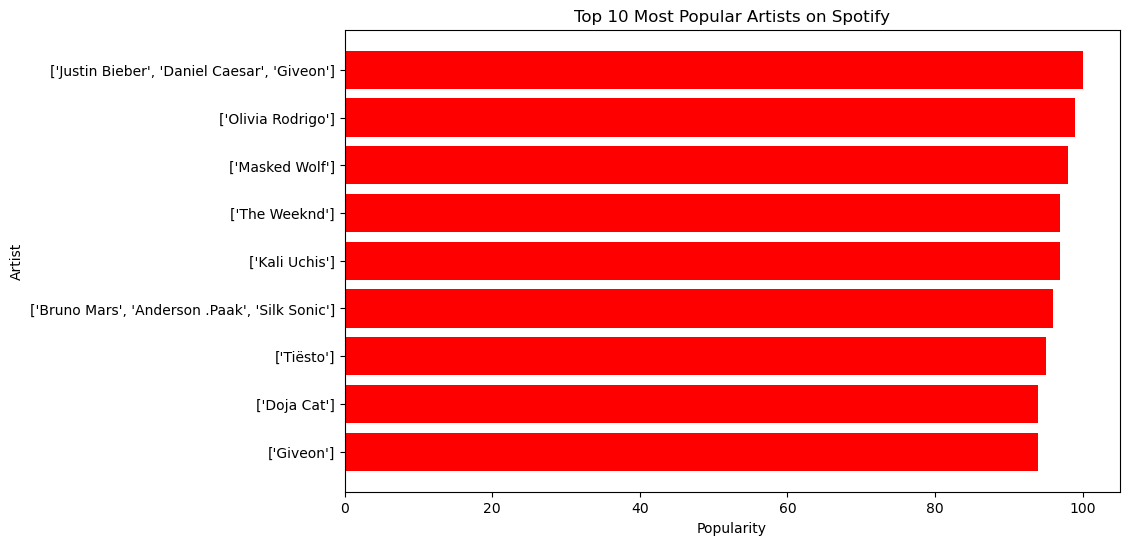

In [8]:
most_popular = df_tracks[df_tracks['popularity'] > 90].sort_values('popularity', ascending=False).head(10)

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(most_popular['artists'], most_popular['popularity'], color='red')
plt.xlabel('Popularity')
plt.ylabel('Artist')
plt.title('Top 10 Most Popular Artists on Spotify')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most popular song at the top
plt.show()


The chart above displays the 10 most popular artists on Spotify, all of whom have songs with a popularity score above 90. These artists represent the top hits on the platform. The horizontal bar chart shows that artists like Justin Bieber (featuring Daniel Caesar and Giveon), Olivia Rodrigo, and The Weeknd are among the most popular.

### 1.3 Most Popular Songs on Spotify

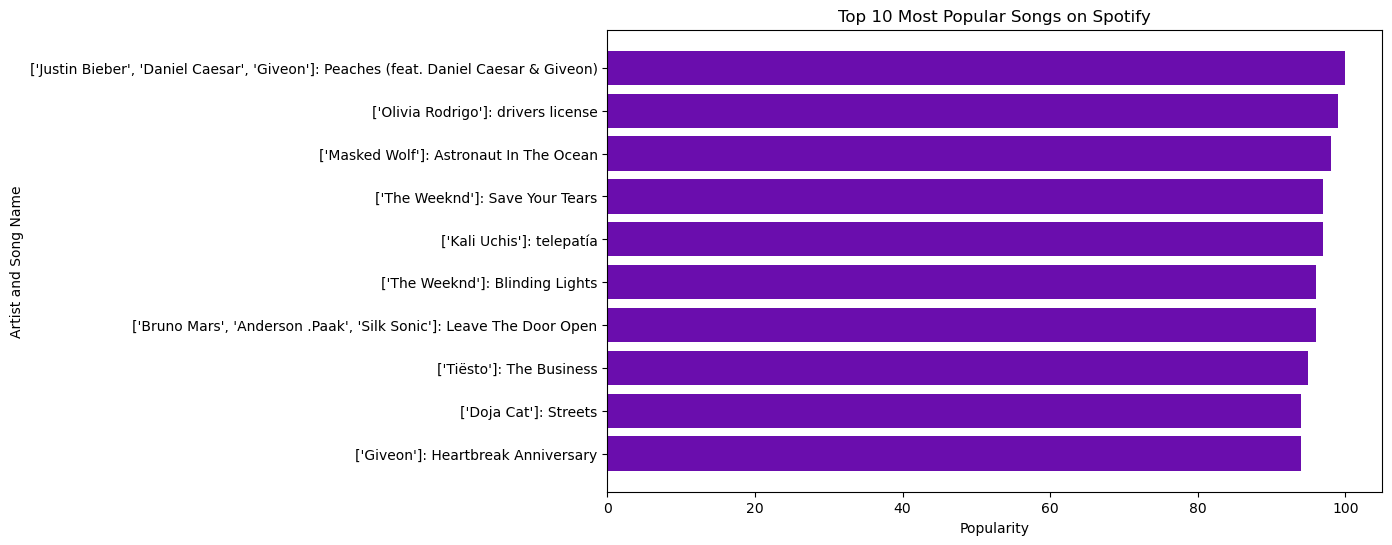

In [9]:
import matplotlib.pyplot as plt

# Define the color "Purple Rain"
purple_rain = "#6A0DAD"

# Top 10 most popular songs on Spotify
most_popular = df_tracks[df_tracks['popularity'] > 90].sort_values('popularity', ascending=False).head(10)

# Criando uma lista de rótulos que combina os nomes das músicas e dos artistas
labels = [f"{artist}: {song}" for artist, song in zip(most_popular['artists'], most_popular['name'])]

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(labels, most_popular['popularity'], color=purple_rain)
plt.xlabel('Popularity')
plt.ylabel('Artist and Song Name')
plt.title('Top 10 Most Popular Songs on Spotify')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most popular song at the top
plt.show()


The chart above displays the 10 most popular songs on Spotify, all with a popularity score above 90. These songs represent the top hits on the platform. The horizontal bar chart shows that songs like "Peaches" by Justin Bieber (featuring Daniel Caesar and Giveon), "drivers license" by Olivia Rodrigo, and "Blinding Lights" by The Weeknd are among the most popular.

### 1.4 Correlation Heatmap Between Variables 

In [10]:
# Transform miliseconds duration to seconds

df_tracks['duration'] = df_tracks['duration_ms'].apply(lambda x: round(x/1000))
df_tracks.drop('duration_ms', inplace = True, axis = 1)

In [11]:
df_tracks.duration.head()

0    127
1     98
2    182
3    177
4    163
Name: duration, dtype: int64

In [12]:
import pandas as pd

# Supondo que 'df_tracks' seja o seu DataFrame
# Substitua 'df_tracks' pelo nome real do seu DataFrame

# Lista das colunas a serem verificadas
colunas_verificar = ["key", "mode", "explicit"]

# Convertendo as colunas para valores numéricos, convertendo valores não numéricos para NaN
df_tracks[colunas_verificar] = df_tracks[colunas_verificar].apply(pd.to_numeric, errors='coerce')

# Verificando se há valores NaN nessas colunas
valores_nao_numericos = df_tracks[colunas_verificar].isnull().any()

# Imprimindo quais colunas têm valores não numéricos
for coluna, tem_nao_numerico in valores_nao_numericos.items():
    if tem_nao_numerico:
        print(f"A coluna '{coluna}' possui valores não numéricos.")
    else:
        print(f"A coluna '{coluna}' não possui valores não numéricos.")

A coluna 'key' não possui valores não numéricos.
A coluna 'mode' não possui valores não numéricos.
A coluna 'explicit' não possui valores não numéricos.


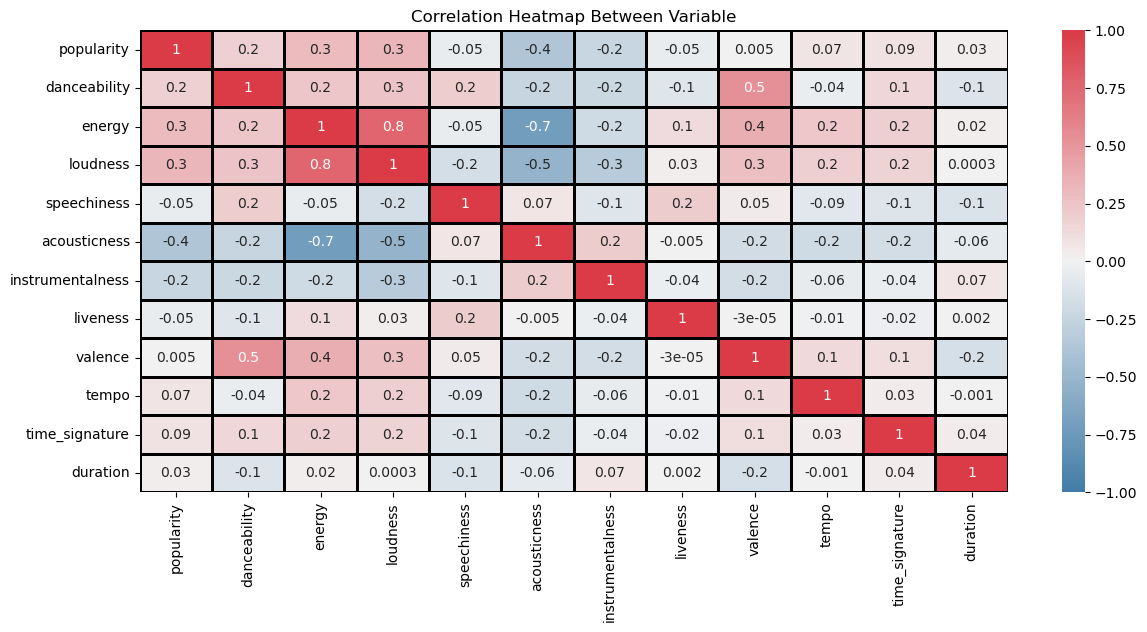

In [13]:
# Create a Correlation Heatmap Between Variables

# Columns that will be used to calculate the correlation
columns_correlation = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                      'time_signature', 'duration']

# Calculating the correlation matrix only with the desired columns
corr_df = df_tracks[columns_correlation].corr(method="pearson")

# Defining custom colormap for the heatmap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plotting the heatmap
plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(corr_df,
                      annot=True,
                      fmt='.1g',
                      vmin=-1,
                      vmax=1,
                      center=0,
                      cmap=cmap,
                      linewidths=1,
                      linecolor='Black')
heatmap.set_title("Correlation Heatmap Between Variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
plt.show()

The heatmap above displays the correlation matrix between various musical attributes of Spotify tracks. Here is the analysis of the results:

1. **Popularity and Loudness/Energy**:
   - Popularity has a moderate positive correlation with both loudness (0.3) and energy (0.3). This suggests that songs that are louder and have higher energy levels tend to be more popular.

2. **Danceability and Energy/Valence**:
   - Danceability shows a moderate positive correlation with energy (0.6) and valence (0.5). This indicates that songs that are more energetic and have a happier or more positive tone are also more danceable.

3. **Energy and Loudness**:
   - There is a strong positive correlation between energy and loudness (0.8). This is expected as louder songs often feel more energetic.

4. **Speechiness and Instrumentalness/Acousticness**:
   - Speechiness has a moderate positive correlation with instrumentalness (0.5) and a moderate negative correlation with acousticness (-0.5). This suggests that tracks with higher speechiness tend to have more instrumental elements and are less acoustic.

5. **Acousticness and Instrumentalness**:
   - Acousticness has a strong positive correlation with instrumentalness (0.7). This indicates that more acoustic tracks tend to have more instrumental elements.

6. **Valence and Energy**:
   - Valence shows a moderate positive correlation with energy (0.4), suggesting that happier or more positive songs tend to be more energetic.

7. **Instrumentalness and Danceability**:
   - Instrumentalness has a moderate negative correlation with danceability (-0.2), indicating that tracks with more instrumental content are generally less danceable.

8. **Time Signature**:
   - The time signature has weak correlations with most other variables, indicating it is relatively independent of other musical attributes.

This heatmap provides valuable insights into how different musical attributes relate to each other, helping to understand what features are commonly associated with popular and energetic tracks. These insights can be useful for music producers, marketers, and data analysts in the music industry to tailor their strategies for creating and promoting music.




### 1.5 Filtered Correlation Heatmap

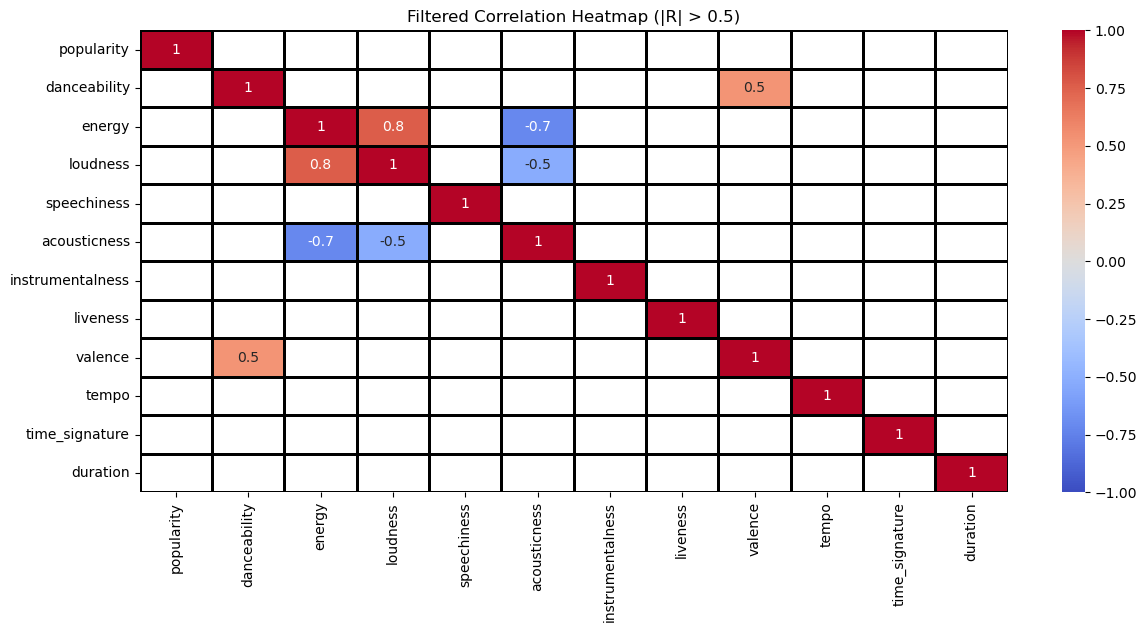

In [14]:
# Filter the matrix with the most significant correlations
corr_filtered = corr_df[abs(corr_df) > 0.5]

# Plotting the heatmap
plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(corr_filtered,
                      annot=True,
                      fmt='.1g',
                      vmin=-1,
                      vmax=1,
                      center=0,
                      cmap='coolwarm',
                      linewidths=1,
                      linecolor='Black')
heatmap.set_title("Filtered Correlation Heatmap (|R| > 0.5)")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
plt.show()

The heatmap above displays the filtered correlation matrix between various musical attributes of Spotify tracks, highlighting only the most significant correlations (|r| > 0.5). Here is the analysis of the results:

1. **Energy and Loudness**:
   - There is a strong positive correlation between energy and loudness (0.8). This is expected as louder songs often feel more energetic.

2. **Acousticness and Energy/Loudness**:
   - Acousticness has a strong negative correlation with both energy (-0.7) and loudness (-0.5). This suggests that more acoustic tracks tend to be quieter and less energetic.

3. **Danceability and Valence**:
   - Danceability shows a moderate positive correlation with valence (0.5). This indicates that songs with a happier or more positive tone are generally more danceable.

4. **Instrumentalness and Acousticness**:
   - Instrumentalness has a strong positive correlation with acousticness (0.7). This suggests that tracks with higher instrumental content tend to be more acoustic.

5. **Popularity, Speechiness, Liveness, Tempo, Time Signature, Duration**:
   - These attributes do not show significant correlations with others (|r| > 0.5), indicating they are relatively independent of other musical attributes or their correlations are weaker than the threshold set.

This filtered heatmap provides a focused view of the most significant relationships between musical attributes, helping to understand the key factors that interact with each other in defining the characteristics of Spotify tracks. These insights can be valuable for music producers, marketers, and data analysts in the music industry for strategic decision-making.


### 1.6 Correlation Plot between Loudness and Energy

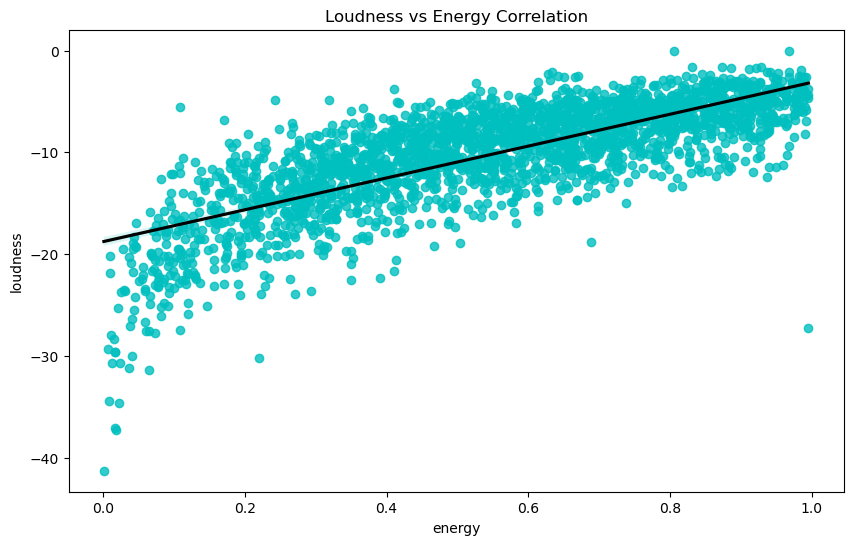

In [15]:
# Correlation Plot between Loudness and Energy

from scipy.stats import pearsonr

# Sampling the data
sample_df = df_tracks.sample(int(0.004*len(df_tracks)))

# Plotting the regression plot
plt.figure(figsize=(10,6))
ax = sns.regplot(data=sample_df, y='loudness', x='energy', color='c')

# Customizing the regression line
ax.lines[0].set_color('black')

# Adding title to the plot
plt.title('Loudness vs Energy Correlation')

plt.show()


The scatter plot with regression line above illustrates the correlation between loudness and energy for a sample of Spotify tracks.

1. **Positive Correlation**:
   - The plot shows a clear positive correlation between loudness and energy. As the energy level of a track increases, its loudness also tends to increase.

2. **Trend Line**:
   - The black regression line indicates the trend of this relationship. The upward slope of the line reinforces the positive correlation between the two variables.

3. **Data Distribution**:
   - The data points are spread across the plot, but there is a noticeable concentration in the higher energy and loudness regions, suggesting that most tracks with high energy also have high loudness.

4. **Outliers**:
   - There are some outliers with high energy but lower loudness and vice versa, but these are relatively few compared to the overall trend.

This analysis confirms that louder tracks tend to be more energetic, which is consistent with our expectations of how energy and loudness interact in music. These insights are valuable for understanding the characteristics of music that make it feel more energetic and loud.

### 1.7 Correlation Plot between Popularity and Acousticness

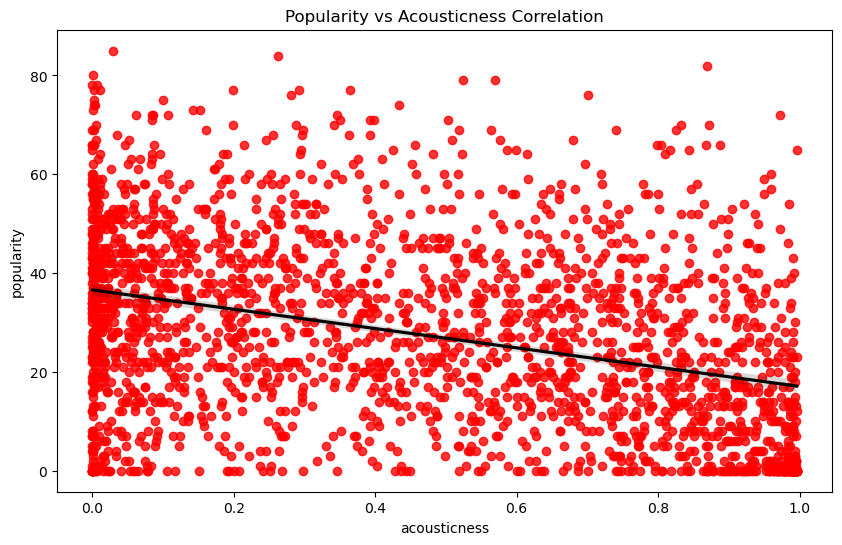

In [16]:
# Correlation Plot between Popularity and Acousticness

# Plotting the figure with specified size
plt.figure(figsize=(10,6))

# Plotting the regression plot with red dots and black correlation line
sns.regplot(data=sample_df, y="popularity", x="acousticness", color="red", line_kws={"color":"black"}).set(title="Popularity vs Acousticness Correlation")

# Display the plot
plt.show()


The scatter plot with regression line above illustrates the correlation between popularity and acousticness for a sample of Spotify tracks.

1. **Negative Correlation**:
   - The plot shows a slight negative correlation between popularity and acousticness. As the acousticness of a track increases, its popularity tends to decrease slightly.

2. **Trend Line**:
   - The black regression line indicates the trend of this relationship. The downward slope of the line reinforces the negative correlation between the two variables.

3. **Data Distribution**:
   - The data points are spread across the plot, indicating a wide range of popularity and acousticness values. However, there is a higher concentration of tracks with low acousticness (less than 0.2) and varying levels of popularity.

4. **Outliers**:
   - There are some outliers with high acousticness and varying popularity levels, but these are relatively few compared to the overall trend.

This analysis suggests that tracks with higher acousticness tend to be slightly less popular.


### 1.8 Number of Songs Released per Year

In [17]:
df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date'], errors='coerce')
years = df_tracks['release_date'].dt.year

# Mostrar os primeiros anos para verificar
print(years.head())

0    1922.0
1    1922.0
2    1922.0
3    1922.0
4       NaN
Name: release_date, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


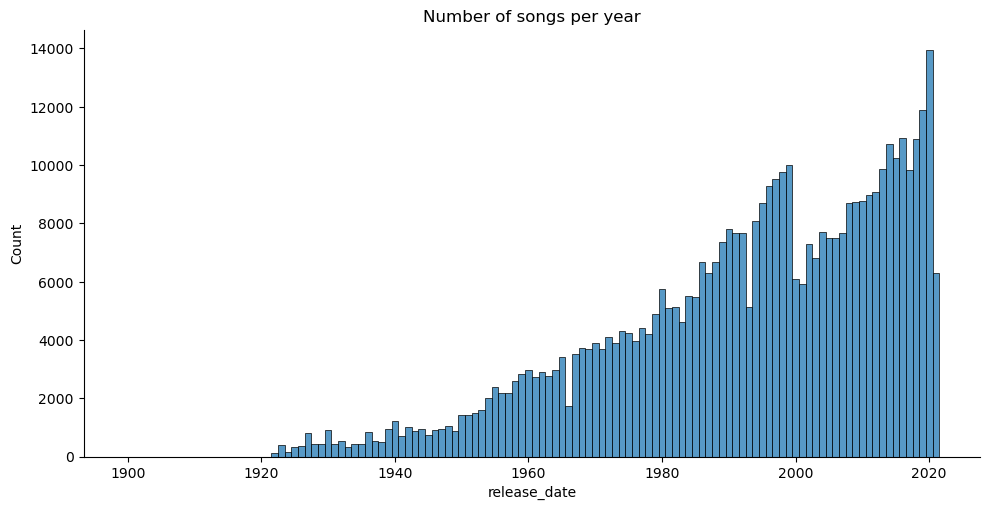

In [18]:
#Number of songs over the years

sns.displot(years,
            discrete=True, 
            aspect=2,
            height=5,
            kind='hist').set(title="Number of songs per year")

The histogram above illustrates the number of songs released per year from the dataset.

1. **Increasing Trend Over Time**:
   - The plot shows a clear increasing trend in the number of songs released each year. This increase is particularly noticeable from the 1950s onwards.

2. **Notable Peaks**:
   - There are significant peaks in the number of releases around the late 1990s and 2020s. These peaks may correspond to technological advancements, changes in the music industry, or other cultural factors that influenced music production.

3. **Historical Context**:
   - The lower number of releases before the 1950s can be attributed to the limitations in music recording and distribution technologies. As these technologies evolved, more music was produced and distributed.

4. **Recent Surge**:
   - The sharp increase in releases in the 2000s and 2010s aligns with the rise of digital music production and online distribution platforms, such as Spotify, which make it easier for artists to release music.

5. **Potential Decline in 2021**:
   - The apparent decline in the number of releases for the most recent year (2021) could be due to incomplete data for the year or other external factors affecting music production and release schedules.

This analysis highlights the growth of music production over the past century, with a notable surge in recent decades. 


### 1.9 Duration of Songs Over the Years (Bar Plot)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 [Text(0, 0, '1900.0'),
  Text(1, 0, '1922.0'),
  Text(2, 0, '1923.0'),
  Text(3, 0, '1924.0'),
  Text(4, 0, '1925.0'),
  Text(5, 0, '1926.0'),
  Text(6, 0, '1927.0'),
  Text(7, 0, '1928.0'),
  Text(8, 0, '1929.0'),
  Text(9, 0, '1930.0'),
  Text(10, 0, '1931.0'),
  Text(11, 0, '1932.0'),
  Text(12, 0, '1933.0'),
  Text(13, 0, '1934.0'),
  Text(14, 0, '1935.0'),
  Text(15, 0, '1936.0'),
  Text(16, 0, '1937.0'),
  Text(17, 0, 

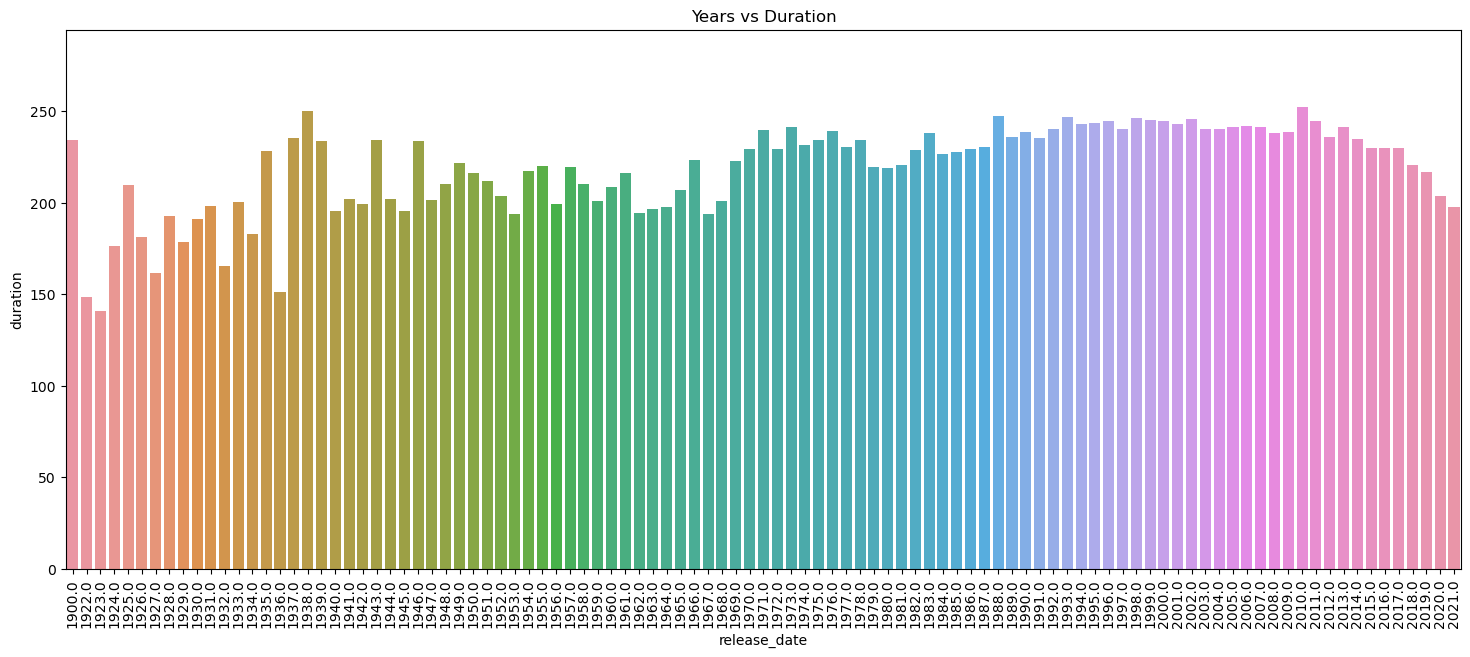

In [19]:
# Duration of the Songs over the years (barplot)

fig, ax = plt.subplots(figsize = (18,7))
fig = sns.barplot(x=years, y=df_tracks.duration, ax = ax, errwidth=False).set(title="Years vs Duration")
plt.xticks(rotation=90)

The bar plot above illustrates the average duration of songs released each year from the dataset.

1. **Variability in Early Years**:
   - In the early years (1900-1940), there is noticeable variability in song duration. Some years have higher average durations, while others are significantly lower. This could be due to the limited data available for these early years or varying recording practices.

2. **Stabilization Period**:
   - From the 1950s to the 2000s, the average duration of songs stabilizes around 200 seconds (approximately 3 minutes and 20 seconds). This period marks the standardization of song lengths in the music industry.

3. **Recent Trends**:
   - In the 2010s and 2020s, there is a slight decrease in the average duration of songs. This trend may reflect changes in listener preferences and the rise of streaming platforms where shorter songs can lead to higher play counts and more revenue.

4. **Consistency in the Modern Era**:
   - Despite the slight decrease in recent years, the overall duration of songs has remained relatively consistent over the past few decades. This suggests that while there are trends and variations, the music industry has settled on an average song length that appeals to listeners.

This analysis provides insights into how the duration of songs has evolved over time, reflecting changes in the music industry's standards and consumer preferences.

### 1.10 Duration of Songs Over the Years (Line Plot)

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1880.0, 0, '1880'),
  Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

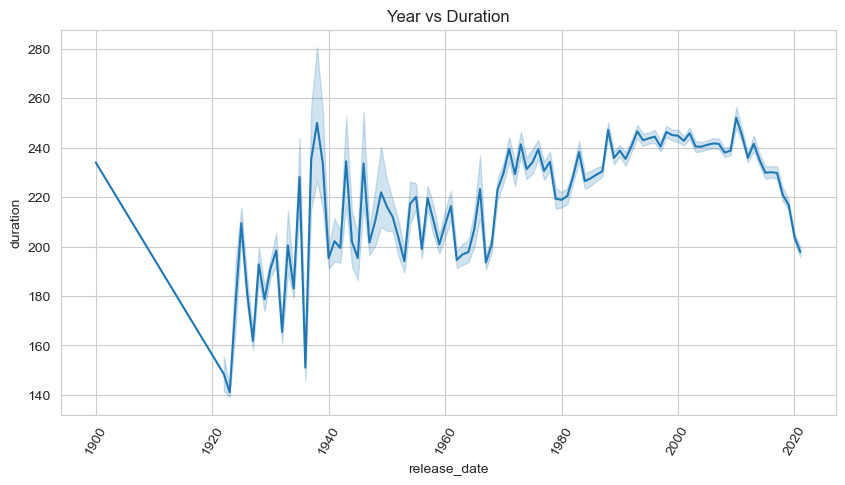

In [20]:
# Duration of the Songs over the years (lineplot)

total_dr = df_tracks.duration
sns.set_style(style='whitegrid')
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.lineplot(x=years, y=total_dr, ax=ax).set(title="Year vs Duration")
plt.xticks(rotation=60)

The line plot above illustrates the average duration of songs released each year from the dataset.

1. **Early Variability**:
   - In the early 1900s, there is noticeable variability in song duration. This period shows a significant fluctuation in the average duration, which can be attributed to the limited data and varying recording practices.

2. **Mid-20th Century Stability**:
   - From the 1940s to the 1980s, the average duration of songs stabilizes around 200 to 240 seconds. This period marks the standardization of song lengths in the music industry.

3. **Modern Trends**:
   - In the 1990s and 2000s, the average duration of songs remains relatively stable, with slight increases and decreases. However, there is a slight downward trend in the 2010s and 2020s, indicating that songs have become shorter on average in recent years.

4. **Peaks and Troughs**:
   - The plot shows several peaks and troughs over the decades, reflecting the changing trends and preferences in the music industry. These variations can be influenced by different genres, technological advancements, and cultural shifts.

5. **Overall Consistency**:
   - Despite the fluctuations, the overall duration of songs has remained within a specific range, suggesting that the music industry has found an optimal length that appeals to listeners.

This analysis provides insights into how the duration of songs has evolved over time, reflecting changes in industry standards and consumer preferences.


# 2. Genre Analysis 

### Load SpotifyFeatures dataset

In [2]:
df_genre=pd.read_csv("C:/Users/bruep/Downloads/archive_1/SpotifyFeatures.csv")

In [3]:
df_genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


### 2.1 Duration of Songs in Different Genres

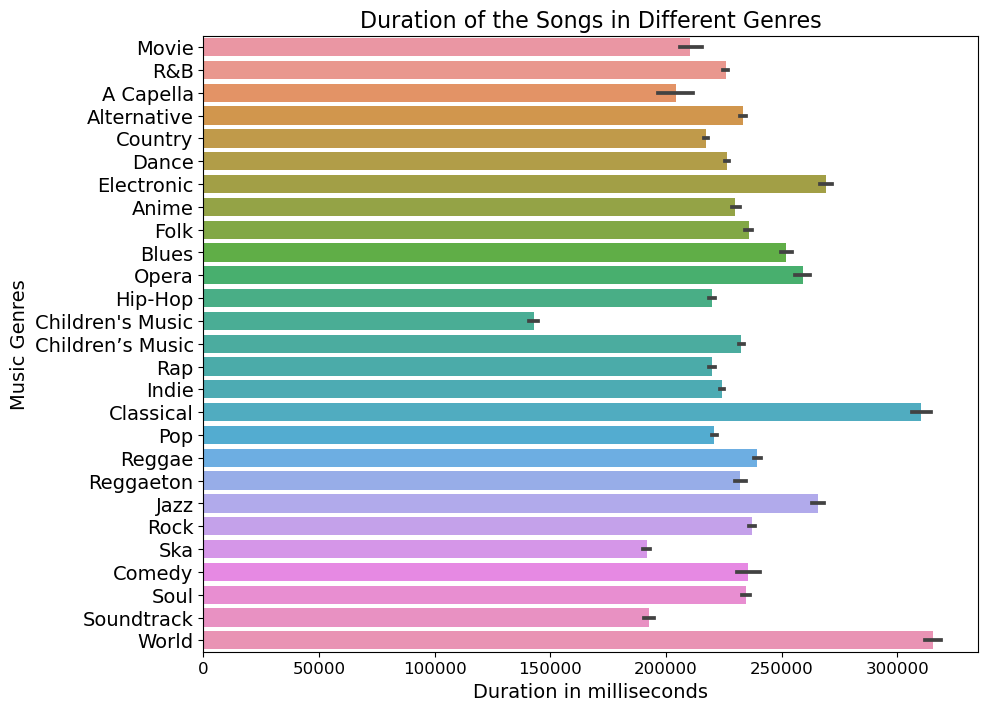

In [7]:
# Bar plot of Duration of the Songs in Different Genres

plt.figure(figsize=(10, 8))  # Adjusts the plot size

plt.title("Duration of the Songs in Different Genres", fontsize=16)  # Sets the title and font size
sns.color_palette("rocket", as_cmap=True)
sns.barplot(y='genre', x='duration_ms', data=df_genre)
plt.xlabel("Duration in milliseconds", fontsize=14)  # Sets the x-axis label and font size
plt.ylabel("Music Genres", fontsize=14)  # Sets the y-axis label and font size
plt.xticks(fontsize=12)  # Adjusts the font size of the x-axis tick labels
plt.yticks(fontsize=14)  # Adjusts the font size of the y-axis tick labels

plt.show()

The bar plot above illustrates the average duration of songs in various genres.

1. **Top Genres by Duration**:
   - The genres with the longest average song durations are "World," "Soundtrack," and "Soul," each with durations significantly above 250,000 milliseconds (250 seconds or about 4 minutes and 10 seconds).

2. **Mid-range Durations**:
   - Genres such as "Classical," "Pop," "Reggae," and "Jazz" have average durations around 200,000 milliseconds (200 seconds or about 3 minutes and 20 seconds). These genres tend to have moderately long songs compared to others.

3. **Shorter Durations**:
   - The genres with the shortest average durations include "A Capella," "Children's Music," and "Dance," each with durations around 150,000 milliseconds (150 seconds or about 2 minutes and 30 seconds).

4. **Genre Comparisons**:
   - "World" music stands out with the longest average duration, while "A Capella" has the shortest. This highlights the diversity in song lengths across different genres.

5. **Consistency**:
   - There is a noticeable consistency within genres, as indicated by the small error bars, which suggests that the average duration is a good representative of individual song durations within each genre.

This analysis provides valuable insights into the typical song lengths for different genres, which can be useful for music producers, marketers, and playlist curators in tailoring their content to match listener preferences and expectations for each genre.


### 2.2 Top 5 Genres by Popularity

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Dance'),
  Text(0, 1, 'Pop'),
  Text(0, 2, 'Rap'),
  Text(0, 3, 'Hip-Hop'),
  Text(0, 4, 'Reggaeton')])

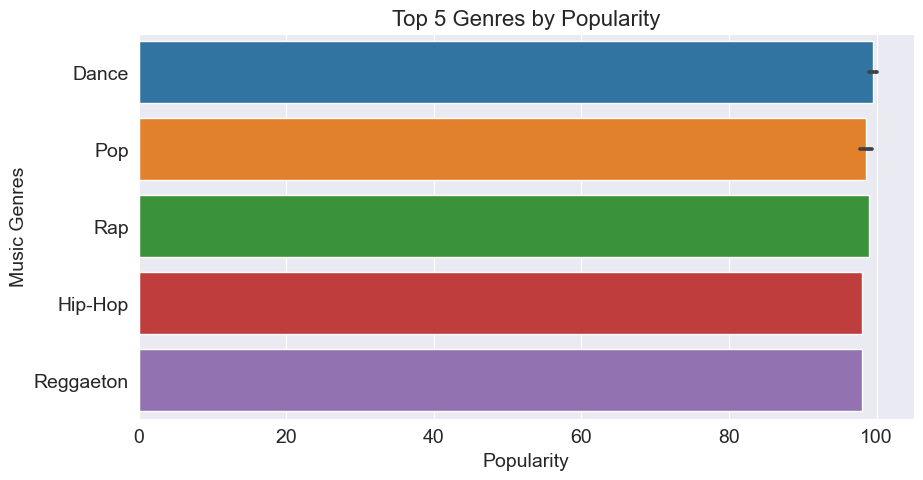

In [24]:
# Barplot of Top 5 Genres by Popularity

sns.set_style(style="darkgrid")
plt.figure(figsize=(10,5))
famous = df_genre.sort_values('popularity', ascending=False).head(10)
sns.barplot(y='genre', x='popularity', data=famous)
plt.title("Top 5 Genres by Popularity", fontsize=16)
plt.xlabel("Popularity", fontsize=14)
plt.ylabel("Music Genres", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

The bar plot above illustrates the top 5 music genres by popularity, based on the dataset.

1. **Dance**:
   - Dance music ranks as the most popular genre, with an average popularity score close to 100. This indicates that dance tracks are highly favored among listeners on the platform.

2. **Pop**:
   - Pop music follows closely behind dance music in popularity. Its high score reflects its broad appeal and consistent presence in the music industry.

3. **Rap**:
   - Rap is the third most popular genre, showing its significant impact and popularity among listeners.

4. **Hip-Hop**:
   - Hip-Hop, often closely associated with rap, also ranks highly in popularity, indicating its strong influence and listener base.

5. **Reggaeton**:
   - Reggaeton rounds out the top five, showcasing its widespread popularity, particularly in regions where Latin music has a strong cultural presence.

This analysis highlights the genres that dominate in popularity on the platform.